In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geojson
import folium

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('input.csv',
    skiprows=4,
    dtype={
    'REFERENCE': str,
    'PLACENAME': str,
    'DESIGNATION': str,
    'STATUS': str,
    'DUAL NAME': str,
    'GAZETTE DATE': str,
    'GEOGRAPHICAL NAME': str,
    'PREVIOUS NAMES': str,
    'GNB FILE': str,
    'LGA': str,
    'LGA AT GAZETTAL': str,
    '1:25,000 MAP NAME': str,
    '1:100,000 MAP': str,
    'PARISH': str,
    'COUNTY': str,
    'DESCRIPTION': str,
    'MEANING': str,
    'ORIGIN': str,
    'HISTORY': str,
    'PRONUNCIATION': str,
    'ABORIGINAL NAME': str,
    'GDA2020 LAT': float })

pd.set_option('display.max_columns', None)
df.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
0,NaN,12 Mile Dam,TANK,Official Recorded,NaN,21st December 1990,NaN,NaN,3268,BOGAN,BOGAN,-32.123384,146.673461,BOBADAH,BOBADAH 8233,NaN,FLINDERS,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,16 Mile Gum Tank Govt Tank,TANK,Variant,NaN,NaN,Sixteen Mile Gums Tank,NaN,NaN,NaN,NaN,-34.765129,144.767944,NaN,HAY 7828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1st Branch Creek,CREEK,Variant,NaN,NaN,Wattle Point Creek,NaN,NaN,NaN,NaN,-29.215068,152.651086,NaN,COALDALE 9439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,20 Mile Hollow,RURAL PLACE,Discontinued,NaN,24th July 1970,NaN,NaN,8930,BLUE MOUNTAINS,BLUE MOUNTAINS,-33.731751,150.484505,KATOOMBA,KATOOMBA 8930,WOODFORD,COOK,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2nd Branch of Josephs Creek,CREEK,Variant,NaN,NaN,Mays Camp Creek,NaN,NaN,NaN,NaN,-29.215068,152.667753,NaN,COALDALE 9439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
aboriginal_places = df.loc[df['ABORIGINAL NAME'] == 'Yes']
aboriginal_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
1602,NaN,Aunty Mary Hooker Rest Area,RESERVE,Rejected,NaN,NaN,NaN,NaN,6091,MID-WESTERN REGIONAL,MID-WESTERN REGIONAL,-32.797679,149.798407,Kandos,Mudgee 8832,Tannabutta,Wellington,Roadside Rest Area at 9176 Castlereagh Highway...,NaN,Aunty Mary Hooker was a proud Biripi / Bundjal...,NaN,NaN,Yes
1736,NaN,Baayay Girrawiiny,PICNIC AREA,Recommendation With Minister,NaN,NaN,NaN,NaN,GNB 6205,PARKES,PARKES,-33.107115,147.803273,Bogan Gate,Bogan Gate 8431,Gunningbland,Cunningham,"The site is located on Hutton Street, Bogan Ga...","Baayay - meeting place of two parities, a trys...",The proposed name seeks to acknowledge that th...,NaN,NaN,Yes
2091,NaN,Badagarang,SUBURB,Official Assigned,NaN,24th February 2023,NaN,NaN,3653,SHOALHAVEN,SHOALHAVEN,-34.831207,150.573967,Berry,NaN,Bunberra; Illaroo,Camden,An address locality within Shoalhaven Local Go...,NaN,"From the local Aboriginal language group, Dhar...",NaN,Bada-garang,Yes
2145,NaN,Badu Narang,GULLY,Dual - Official Assigned,Bardenarang Gully,24th June 2022,NaN,NaN,6159,HAWKESBURY,HAWKESBURY,-33.575700,150.853036,Wilberforce,Penrith 9030,Pitt Town,Cumberland,A creek running north from Pitt Town Lagoon in...,Small freshwater source,Badu Narang was the name given by Darug people...,NaN,Badu Narang,Yes
2302,NaN,Balawan,MOUNTAIN,Dual - Official Assigned,Mount Imlay,18th July 2014,Mount Imlay,NaN,NaN,BEGA VALLEY,BEGA VALLEY,-37.180366,149.734218,MOUNT IMLAY,EDEN 8823,STURT,AUCKLAND,A mountain about 10 km S by E of Village of To...,NaN,NaN,NaN,NaN,Yes


In [4]:
meaning_places = df[df['MEANING'].str.contains('aboriginal', na=False)]
meaning_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
1705,NaN,Awabakal Field Studies Centre,SCHOOL,Official Assigned,NaN,23rd February 1979,NaN,NaN,1455,LAKE MACQUARIE,LAKE MACQUARIE,-32.981738,151.717808,WALLSEND,NEWCASTLE 9232,KAHIBAH,NORTHUMBERLAND,"A S.S.P. School in Boundary Street, Dudley.",An aboriginal word meaning 'people of the plai...,NaN,NaN,NaN,NaN
1729,NaN,Baan Baa,PARISH,Official Assigned,NaN,11th November 1966,NaN,NaN,NaN,NARRABRI,NARRABRI,-30.615082,150.017810,THERRIBRI,BAAN BAA 8836; BOGGABRI 8936,BAAN BAA,POTTINGER,An administrative area.,Baan Baa aboriginal word meaning 'swim away' R...,"'Baonbad'. The station of Lady Jamison, in the...",'As was invariably the experience after each e...,BAN BA,NaN
2614,NaN,Balgowlah,SUBURB,Official Assigned,NaN,16th July 1976; 17th January 1992,NaN,NaN,3641,NORTHERN BEACHES,MANLY,-33.794496,151.260870,SYDNEY HEADS,SYDNEY 9130,MANLY COVE,CUMBERLAND,A suburb about 3 km S of Allambie Heights and ...,The name Balgowlah or (Bulgowlah) is an aborig...,Aboriginal.,NaN,bal-gow-la,NaN
2681,NaN,Ballina,PARISH,Official Assigned,NaN,21st May 1971,NaN,NaN,NaN,BALLINA,BALLINA,-28.831730,153.551070,BALLINA,BALLINA 9640,BALLINA,ROUS,A lands administrative division.,Balluna aboriginal for where the river enters ...,NaN,NaN,NaN,NaN
2682,NaN,Ballina,TRIG. STATION,Official Assigned,NaN,2nd August 1974,NaN,Ballina New,NaN,BALLINA,BALLINA,-28.865063,153.584404,BALLINA,BALLINA 9640,BALLINA,ROUS,A trig station about 1 km E of the town of Bal...,Balluna aboriginal for where the river enters ...,NaN,NaN,NaN,NaN


In [5]:
origin_places = df[df['ORIGIN'].str.contains('aboriginal', na=False)]
origin_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
701,NaN,Amaroo Gully,CREEK,Official Assigned,NaN,4th December 1992; 11th December 1992,NaN,NaN,3886,KU-RING-GAI,KU-RING-GAI,-33.759520,151.145604,HORNSBY,SYDNEY 9130,GORDON,CUMBERLAND,A creek extending appproximately 1 km from Val...,NaN,Amaroo is an aboriginal word meaning 'a beauti...,NaN,NaN,NaN
702,NaN,Amaroo Park,RESERVE,Official Assigned,NaN,11th November 1988,NaN,NaN,3207,UPPER HUNTER,UPPER HUNTER,-32.048411,150.867814,SCONE,MUSWELLBROOK 9033,STRATHEARN,BRISBANE,A reserve located near the junction of Gundy R...,NaN,Amaroo is an aboriginal word meaning 'a beauti...,NaN,NaN,NaN
703,NaN,Amaroo Railway Station,RAILWAY STATION,Deferred,NaN,30th September 1992,NaN,Amaroo Platform,3930,CABONNE,CABONNE,-33.181760,148.917854,MOLONG,MOLONG 8631,BOREE NYRANG,ASHBURNHAM,Closed 8/3/75.,NaN,Amaroo is an aboriginal word meaning 'a beauti...,NaN,NaN,NaN
2862,NaN,Bangalee Reserve,RESERVE,Official Assigned,NaN,9th January 1987,NaN,NaN,2354,PORT STEPHENS,PORT STEPHENS,-32.781736,152.101133,MORNA POINT,PORT STEPHENS 9332,TOMAREE,GLOUCESTER,"A reserve in Ocean Parade, Boat Harbour. (D.P....",NaN,Is said to be aboriginal for 'Sandy Beach',NaN,NaN,NaN
3010,NaN,Baradine,TOWN,Official Assigned,NaN,31st August 1973,NaN,NaN,NaN,WARRUMBUNGLE,WARRUMBUNGLE,-30.948421,149.067829,BARADINE,BARADINE 8736,BARADINE,BARADINE,A town about 10km SSE of Cowans Crossing and a...,Aboriginal: red wallaby (Reed 1967),"Believed to be aboriginal. Atchison, J.F. 1980...",NaN,NaN,NaN


In [6]:
first_nations_named_places = pd.concat([aboriginal_places, meaning_places, origin_places])
first_nations_named_places = first_nations_named_places.drop_duplicates()
status_count = first_nations_named_places.groupby(by="STATUS").size()
status_count = status_count.reset_index(name='COUNT')
status_count

,STATUS,COUNT
0,Abandoned,1
1,Applicant To Review Comments,2
2,Board To Consider,3
3,Board To Reconsider,1
4,Closed For Public Comment,2
5,Concurred,6
6,Deferred,2
7,Discontinued,5
8,Dual - Board To Consider,1
9,Dual - Closed For Public Comment,3


In [7]:
first_nations_named_places = first_nations_named_places[['PLACENAME', 'DESIGNATION', 'STATUS', 'DUAL NAME', 'MEANING', 'ORIGIN', 'GEOGRAPHICAL NAME', 'GDA2020 LAT', 'GDA2020 LONG']]
first_nations_named_places.dropna(subset=['GDA2020 LAT'], inplace=True)
first_nations_named_places = first_nations_named_places.query("STATUS.str.contains('Assigned')")

In [8]:
non_first_nations_named_places = df[df['STATUS'].str.contains('Assigned', na=False)]
non_first_nations_named_places = non_first_nations_named_places[non_first_nations_named_places['ABORIGINAL NAME'] != 'Yes']
non_first_nations_named_places.dropna(subset=['GDA2020 LAT'], inplace=True)

In [9]:
# Create GeoJSON files.
def create_geojson_string(dataframe):
    features = []
    for index, row in dataframe.iterrows():
        coordinates = geojson.Point((row['GDA2020 LONG'], row['GDA2020 LAT']))
        properties = dataframe.loc[index, ['PLACENAME', 'DESIGNATION', 'STATUS', 'DUAL NAME', 'MEANING', 
                                           'ORIGIN', 'GEOGRAPHICAL NAME', 'GDA2020 LAT', 'GDA2020 LONG']].to_dict()
        new_properties = {}
        for key, value in properties.items():
            if pd.isna(dataframe.at[index, key]): # Nan values will result in error when passed to GeoJSON.
                new_properties[key] = None
            else:
                new_properties[key] = value

        feature = geojson.Feature(geometry=coordinates, properties=new_properties)
        features.append(feature)
    feature_collection = geojson.FeatureCollection(features)
    geojson_string = geojson.dumps(feature_collection)
    return geojson_string

first_nations_geojson = create_geojson_string(first_nations_named_places)

In [22]:
# Create Folium map.
red_marker = folium.Marker(icon=folium.Icon(color="red", prefix='fa',icon='map-marker'))
m = folium.Map(location=[-31.575567970590456, 146.41701195],zoom_start=6)
folium.GeoJson(data=first_nations_geojson, name="Places with a name of First Nations origin",
               marker = red_marker,
              tooltip=folium.GeoJsonTooltip(fields=['PLACENAME', 'DESIGNATION', 'DUAL NAME',
                                                    'MEANING', 'ORIGIN',
                                                   'GEOGRAPHICAL NAME'])).add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
m.save("NSW_geographical_places.html")

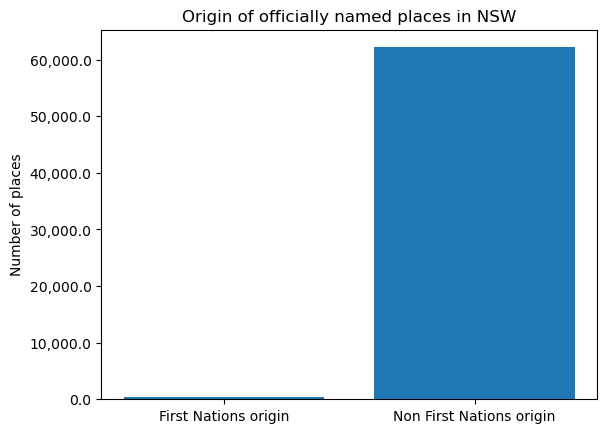

In [23]:
# Column chart.
first_nations_rows = len(first_nations_named_places)
non_first_nations_rows = len(non_first_nations_named_places)
data = [first_nations_rows, non_first_nations_rows]
labels = ['First Nations origin', 'Non First Nations origin']

plt.bar(labels, data)
plt.ylabel('Number of places')
plt.title('Origin of officially named places in NSW')
plt.gca().yaxis.set_major_formatter('{:,}'.format)
plt.show()